In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob

In [2]:
filename = 'C:\Users\Magnus\PhD\Code\MATLAB\Scripts\15_Circumferential_iterations\features_table.txt'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-be66d3a0e059>, line 1)

In [3]:
filename = '/Users/Magnus/PhD/Code/MATLAB/Scripts/15_Circumferential_iterations/features_table.txt'

In [8]:
df_raw = pd.read_csv(filename)

In [9]:
df_raw

,ModelThickMax,ModelThickMin,ModelThickDiff,ModelThickMedian,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
0,61,61,0,61,61.000000,0.000000,0.98,0.000087,-0.090215,-0.820041,1.241630e-06,47851.5625,30273.4375
1,61,61,0,61,61.000000,0.000000,0.99,0.000087,-0.089597,-0.553822,1.238296e-06,47851.5625,31250.0000
2,61,61,0,61,61.000000,0.000000,1.00,0.000086,-0.089083,-0.293270,1.224825e-06,46875.0000,31250.0000
3,61,61,0,61,61.000000,0.000000,1.01,0.000085,-0.088695,-0.038224,1.201823e-06,46875.0000,31250.0000
4,61,61,0,61,61.000000,0.000000,1.02,0.000084,-0.088149,0.211493,1.172012e-06,45898.4375,31250.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,64,54,10,62,62.007812,1.712741,0.98,0.000088,-0.142693,-1.340801,9.852128e-07,47851.5625,30273.4375
376,64,54,10,62,62.007812,1.712741,0.99,0.000087,-0.141701,-1.071701,1.004633e-06,47851.5625,30273.4375
377,64,54,10,62,62.007812,1.712741,1.00,0.000087,-0.141468,-0.808561,1.013324e-06,47851.5625,30273.4375
378,64,54,10,62,62.007812,1.712741,1.01,0.000086,-0.141093,-0.550537,1.011723e-06,46875.0000,30273.4375


In [10]:
corr = df_raw.corr()

In [11]:
corr.style.background_gradient(cmap='coolwarm')

,ModelThickMax,ModelThickMin,ModelThickDiff,ModelThickMedian,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
ModelThickMax,1.000000,0.335000,-0.012633,0.885257,0.898173,0.018115,0.000000,-0.142158,0.293322,0.459714,0.038633,-0.130550,-0.274371
ModelThickMin,0.335000,1.000000,-0.946375,0.657165,0.662576,-0.872262,0.000000,-0.425915,0.805492,0.693827,0.677089,-0.305787,0.015486
ModelThickDiff,-0.012633,-0.946375,1.000000,-0.393870,-0.395184,0.931891,0.000000,0.403254,-0.754245,-0.578690,-0.705308,0.279750,-0.110511
ModelThickMedian,0.885257,0.657165,-0.393870,1.000000,0.984507,-0.410717,-0.000000,-0.306630,0.625575,0.667328,0.368609,-0.236991,-0.184835
ModelThickMean,0.898173,0.662576,-0.395184,0.984507,1.000000,-0.416496,-0.000000,-0.316587,0.649887,0.680639,0.382823,-0.241750,-0.177559
ModelThickStd,0.018115,-0.872262,0.931891,-0.410717,-0.416496,1.000000,0.000000,0.424785,-0.866284,-0.605502,-0.806616,0.287262,-0.149442
ModeVelCoeff,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.796736,0.026372,0.630782,-0.066413,-0.653062,0.111179
EnvelopeAvgTimeDiff,-0.142158,-0.425915,0.403254,-0.306630,-0.316587,0.424785,-0.796736,1.000000,-0.395723,-0.840592,-0.189878,0.838533,-0.213759
EnvelopeAvgAmpReduc,0.293322,0.805492,-0.754245,0.625575,0.649887,-0.866284,0.026372,-0.395723,1.000000,0.697583,0.855903,-0.202912,0.132672
PhaseDiffMean,0.459714,0.693827,-0.578690,0.667328,0.680639,-0.605502,0.630782,-0.840592,0.697583,1.000000,0.486323,-0.662082,0.024258


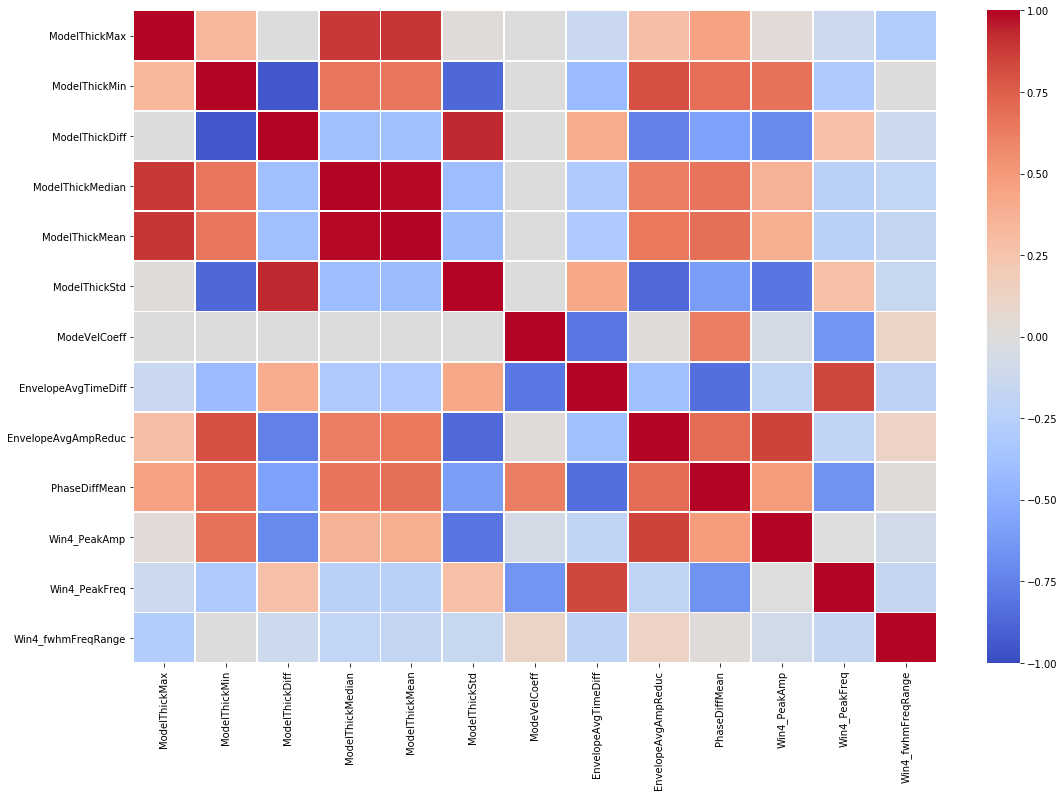

In [12]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr, vmin=-1, vmax=1, fmt='g', cmap='coolwarm', linewidths=0.75 );

In [13]:
from sklearn import linear_model

In [14]:
help(linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model - The :mod:`sklearn.linear_model` module implements a variety of linear models.

PACKAGE CONTENTS
    _base
    _bayes
    _cd_fast
    _coordinate_descent
    _huber
    _least_angle
    _logistic
    _omp
    _passive_aggressive
    _perceptron
    _ransac
    _ridge
    _sag
    _sag_fast
    _sgd_fast
    _stochastic_gradient
    _theil_sen
    base
    bayes
    cd_fast
    coordinate_descent
    huber
    least_angle
    logistic
    omp
    passive_aggressive
    perceptron
    ransac
    ridge
    sag
    sag_fast
    setup
    sgd_fast
    stochastic_gradient
    tests (package)
    theil_sen

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.linear_model._huber.HuberRegressor(sklearn.linear_model._base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.linear_model._logistic.LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set, test_set = train_test_split(df_raw, test_size=0.2, random_state=42)

In [18]:
train_set

,ModelThickMax,ModelThickMin,ModelThickDiff,ModelThickMedian,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
77,61,51,10,59,59.072655,1.595107,1.00,0.000087,-0.154891,-1.369272,9.906604e-07,47851.5625,32226.5625
220,63,59,4,61,61.285938,1.178166,0.98,0.000088,-0.143042,-1.231450,1.038375e-06,47851.5625,30273.4375
297,64,62,2,63,63.011719,0.730666,1.00,0.000085,-0.104810,0.047232,1.074420e-06,45898.4375,32226.5625
113,62,60,2,61,61.052345,0.729954,1.01,0.000085,-0.114350,-0.148511,1.100280e-06,45898.4375,31250.0000
203,63,61,2,62,62.060158,0.732560,1.01,0.000085,-0.115570,0.068608,1.064017e-06,45898.4375,31250.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,61,51,10,59,58.960938,1.674919,0.99,0.000088,-0.147499,-1.750391,1.021054e-06,48828.1250,31250.0000
106,62,60,2,61,61.017967,0.730539,0.99,0.000087,-0.115282,-0.671808,1.149115e-06,46875.0000,31250.0000
270,63,52,11,61,61.017189,1.773672,0.98,0.000087,-0.159450,-1.505736,9.353810e-07,46875.0000,31250.0000
348,64,56,8,62,62.027344,1.667901,1.01,0.000086,-0.138268,-0.525542,1.004022e-06,46875.0000,30273.4375


In [19]:
test_set

,ModelThickMax,ModelThickMin,ModelThickDiff,ModelThickMedian,ModelThickMean,ModelThickStd,ModeVelCoeff,EnvelopeAvgTimeDiff,EnvelopeAvgAmpReduc,PhaseDiffMean,Win4_PeakAmp,Win4_PeakFreq,Win4_fwhmFreqRange
266,63,53,10,61,60.789845,1.750788,0.99,0.000088,-0.150461,-1.381737,1.023370e-06,48828.1250,31250.0000
261,63,53,10,61,60.922657,1.728966,0.99,0.000088,-0.153249,-1.312565,1.004498e-06,47851.5625,30273.4375
265,63,53,10,61,60.789845,1.750788,0.98,0.000089,-0.151040,-1.656948,1.000148e-06,48828.1250,31250.0000
39,61,55,6,59,59.129688,1.453601,1.02,0.000085,-0.164939,-0.915253,9.636096e-07,44921.8750,32226.5625
33,61,57,4,60,59.431252,1.165020,1.01,0.000086,-0.157211,-0.899793,1.016796e-06,46875.0000,31250.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,64,60,4,63,62.450783,1.164667,0.99,0.000087,-0.143670,-0.678803,9.777701e-07,46875.0000,31250.0000
63,61,53,8,59,59.093750,1.544935,1.01,0.000086,-0.155642,-1.099301,9.812873e-07,46875.0000,32226.5625
229,63,57,6,61,61.178123,1.468296,1.02,0.000085,-0.153921,-0.328196,9.507083e-07,44921.8750,30273.4375
82,61,51,10,59,58.977345,1.706892,1.00,0.000086,-0.178593,-1.620298,9.232214e-07,46875.0000,32226.5625
